In [1]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans, SpectralClustering
import scipy.io as spio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
salinas_mat = spio.loadmat('data/Salinas/salinas.mat')
salinas_gt_mat = spio.loadmat('data/Salinas/salinas_gt.mat')
salinas_image = salinas_mat['salinasA_corrected']
salinas_gt = salinas_gt_mat['salinasA_gt']

IP_data_mat=spio.loadmat("data/IP/Indian_pines_corrected.mat")
IP_gt_mat=spio.loadmat("data/IP/Indian_pines_gt.mat")
IP_image=IP_data_mat["indian_pines_corrected"]
IP_gt=IP_gt_mat['indian_pines_gt']

pavia_mat = spio.loadmat('data/PaviaU/PaviaU.mat')
pavia_gt_mat = spio.loadmat('data/PaviaU/PaviaU_gt.mat')
pavia_image = pavia_mat['paviaU']
pavia_gt = pavia_gt_mat['paviaU_gt']

In [3]:
def randIndex(gt_labels, pred_labels):
    return adjusted_mutual_info_score(np.reshape(gt_labels, -1), np.reshape(pred_labels, -1), average_method='warn')

In [4]:
def PCA_clustering(image, gt, n_components):
    # Preprocessing
    m, n, c = np.array(image).shape
    image_flat = np.reshape(image, (m*n, c))
    gt_flat = np.reshape(gt, -1)
    image_flat = np.array(image_flat, dtype=np.float64)
    
    # Standardise the data
    image_std = StandardScaler().fit_transform(image_flat)
    
    # PCA
    pca = PCA(n_components=n_components)
    pCs = pca.fit_transform(image_std)
    
    # KMeans
    k = np.unique(gt_flat).shape[0]-1
    pCs = pCs[gt_flat!=0]
    image_flat = image_flat[gt_flat!=0]
    
    kmeans = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=0).fit(pCs)
    
    labels = kmeans.labels_
    
    # Reconstruct Images
    count, loc, n = 0, 0, gt_flat.shape[0]
    final = np.zeros(n)
    while count<labels.shape[0]:
        if (gt_flat[loc]!=0):
            final[loc]=labels[count]+1
            count+=1
        loc+=1
    
    final = np.reshape(final, gt.shape)
    return final

/home/joshua/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


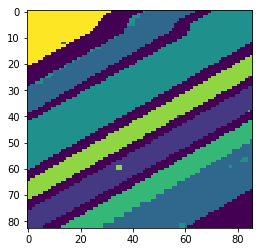

AMIS with PCA on Salinas was 0.908786


/home/joshua/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [17]:
result_sal = PCA_clustering(image=salinas_image, gt=salinas_gt, n_components=50)

plt.imshow(result_sal)
plt.savefig('clustering_sal_pca')
plt.show()

score_sal = randIndex(salinas_gt, result_sal)
print("AMIS with PCA on Salinas was %f"%score_sal) 

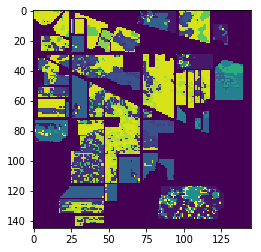

AMIS with PCA on Salinas was 0.648864


/home/joshua/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [18]:
result_ip = PCA_clustering(image=IP_image, gt=IP_gt, n_components=50)

plt.imshow(result_ip)
plt.show()

score_ip = randIndex(IP_gt, result_ip)
print("AMIS with PCA on Salinas was %f"%score_ip)

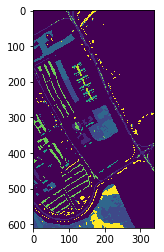

AMIS with PCA on Salinas was 0.830003


/home/joshua/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [19]:
result_pav = PCA_clustering(image=pavia_image, gt=pavia_gt, n_components=50)

plt.imshow(result_pav)
plt.show()

score_pav = randIndex(pavia_gt, result_pav)
print("AMIS with PCA on Salinas was %f"%score_pav)